# Assignment 7 (Week 7)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
```

## Name: OLUWATOYIN AKAMO

<br>

## Please show and display ALL your calculations and results.
> Remember to read the **`instructions`** carefully.

In [1]:
# Built-in library
#import itertools
#import re
#import json
#from typing import Union, Optional, Sequence

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
#%load_ext lab_black
# auto reload imports
#%load_ext autoreload
#%autoreload 2

> The data can be found [here](https://drive.google.com/file/d/1_c3KA14xQC02K0QZ4cpi1emjdz0rqHzb/view?usp=share_link).

### Data Dictionary

```
- Age: continuous.

- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- Final_weight: continuous.

- Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- Education_num: continuous.

- Marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, - Married-AF-spouse.

- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- Genger: Female, Male.

- Capital_gain: continuous.

- Capital_loss: continuous.

- Hours_per_week: continuous.

- Country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- Salary: 
```

### Objective

```
Predict whether a person makes over 50K a year.

```



###  Qs 1. Build a machine learning model that predicts the salary.

###  Qs 2. Evaluate the performance of your model using at least three (3) performance metrics.

<hr>

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

###  Answer no 1. Building a machine learning model that predicts the salary.

In [2]:
def load_data(*, filename: str, sep: str = ",") -> pd.DataFrame:
    """This is used to load the data.

    Params;
        filename (str): The filepath.
        sep (str, default=","): The separator. e.g ',', '\t', etc

    Returns:
        data (pd.DataFrame): The loaded dataframe.
    """
    data = pd.read_csv(filename, sep=sep)
    print(f"Shape of data: {data.shape}\n")
    return data


def plot_counts(
    *,
    data: pd.DataFrame,
    features: list[str],
    n_rows: int,
    n_cols: int,
    figsize: tuple = (15, 8),
) -> "Plot":
    """This returns a count plot of all the specified features."""
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)

    for idx, feat in enumerate(features):
        if n_rows > 1:
            ax = axs[(idx // n_cols), (idx % n_cols)]
        else:
            ax = axs[idx]

        sns.countplot(data=data, x=feat, ax=ax)
        ax.set_title(f"Count Plot of {feat!r}")

        labels = sorted(data[feat].value_counts().index)
        ax.tick_params(axis="x", rotation=80)

        # Annotate the chart
        for bar in ax.patches:
            x_val = bar.get_x() + bar.get_width() / 2  # x pos
            y_val = bar.get_height()  # y pos
            ax.annotate(
                text=y_val,  # text pos
                xy=(x_val, y_val),  # (x, y)
                xytext=(0, 6),  # text position
                ha="center",  # horizontal alignment
                va="center",  # vertical alignment
                size=12,  # text size
                textcoords="offset points",
            )

    fig.tight_layout()
    plt.show()


def plot_histogram(*, data: pd.DataFrame, feature: str) -> "Plot":
    """This returns a Seaborn Histogram."""
    sns.histplot(data=data, x=feature)
    plt.title(f"Distribution of {feature!r}", size=16)
    plt.tight_layout()
    plt.show()


def create_result_dataframe(*, y_true: np.ndarray, y_pred: np.ndarray) -> pd.DataFrame:
    """This returns a DataFrame containing the true,
    predicted and error values."""
    # Convert predictions to a dataframe
    result = pd.DataFrame()  # Empty DF

    result["Actual_score"] = y_true
    result["Predicted_score"] = y_pred
    result["Error_in_predictions"] = result["Actual_score"] - result["Predicted_score"]

    return result


def evaluate_model(*, y_true: np.ndarray, y_pred: np.ndarray) -> str:
    """This is used to evaluate a regressor."""
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

    # Mean Squared Error (The lower, the better)
    mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)

    # Root Mean Squared Error (The lower, the better)
    # Remember to use squared=False
    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)

    # Mean Absolute Error (The lower, the better)
    mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)

    # R Squared (The higher, the better. Max (best) value is 1)
    R2 = r2_score(y_true=y_true, y_pred=y_pred)

    result_str = (
        "==================== Evaluation Metrics ===================="
        f"\nMean Squared Error (The lower, the better!): {round(mse, 3)}"
        f"\nRoot Mean Squared Error (The lower, the better!): {round(rmse, 3)}"
        f"\nMean Absolute Error (The lower, the better!): {round(mae, 3)}"
        "\n==========================================================="
        f"\nR Squared (The higher, the better!): {round(R2, 3)} "
    )

    return result_str

In [3]:
#loading dataset
df= pd.read_csv("salary.csv")


print(f"shape of df:{df.shape}\n")
df.head(567)

shape of df:(32560, 15)



,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
#checking for the type of variables
df.dtypes

Age                int64
Workclass         object
Final_weight       int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Country           object
Salary            object
dtype: object

In [5]:
#checking for missing variables
df.isna().sum()

Age               0
Workclass         0
Final_weight      0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Country           0
Salary            0
dtype: int64

In [6]:
#checking the value count of the target variable
df["Salary"].value_counts(normalize=True)



 <=50K    0.759183
 >50K     0.240817
Name: Salary, dtype: float64

<AxesSubplot:>

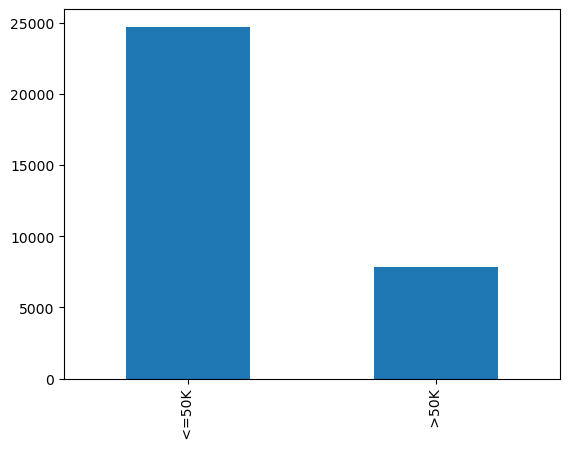

In [7]:
df["Salary"].value_counts().plot(kind= 'bar')

## FEATURE ENGINEERING

## converting the categorical data to numerical data

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
#load the label encoder function
label_encode= LabelEncoder()
#label encoding of the TARGET variable 
labels = label_encode.fit_transform(df.Salary)
df["target"]= labels
df.head()
# 0 == <=50, 1== >50

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary,target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0


In [10]:
df["target"].value_counts()

0    24719
1     7841
Name: target, dtype: int64

In [11]:
df.groupby('target').mean()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
target,,,,,,
0,36.783648,190345.429467,9.594927,148.670537,53.145071,38.840163
1,44.249841,188005.000000,11.611657,4006.142456,195.001530,45.473026


In [12]:
#dropping the Salary variables since it has been encoded
vars_to_drop= [ "Salary"]
df.drop(columns =  vars_to_drop, inplace = True)

df.shape


(32560, 15)

In [13]:
df.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [14]:
# Split the data into numeric and categorical data
num_data = df.select_dtypes(include=[int, float])
# Split the data into numeric and categorical data
num_data = df.select_dtypes(include=[int, float])
cat_data = df.select_dtypes(include=["O"])

# Check the shape of the data
num_data.shape, cat_data.shape


((32560, 7), (32560, 8))

In [15]:
num_data.head()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week,target
0,50,83311,13,0,0,13,0
1,38,215646,9,0,0,40,0
2,53,234721,7,0,0,40,0
3,28,338409,13,0,0,40,0
4,37,284582,14,0,0,40,0


In [16]:
cat_data.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Country
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States


In [17]:
#checking for unique categories of each categorical columns
for col in cat_data:
    print(col, ': ', len(cat_data[col].unique()), 'labels')

Workclass :  9 labels
Education :  16 labels
Marital_status :  7 labels
Occupation :  15 labels
Relationship :  6 labels
Race :  5 labels
Sex :  2 labels
Country :  42 labels


**using label encoder for changing the categorical data into numerical data**

In [18]:
#load the label encoder function
label_encode= LabelEncoder()
#label encoding of the Workclass variable 
labels = label_encode.fit_transform(df.Workclass)
df["workclass"]= labels


In [19]:
#load the label encoder function
label_encode= LabelEncoder()
#label encoding of the Education variable 
labels = label_encode.fit_transform(df.Education)
df["education"]= labels


In [20]:
#load the label encoder function
label_encode= LabelEncoder()
#label encoding of the Marital_status variable 
labels = label_encode.fit_transform(df.Marital_status)
df["marital_status"]= labels

In [21]:
#load the label encoder function
label_encode= LabelEncoder()
#label encoding of the Occupation variable 
labels = label_encode.fit_transform(df.Occupation)
df["occupation"]= labels

In [22]:
#load the label encoder function
label_encode= LabelEncoder()
#label encoding of the Relationship variable 
labels = label_encode.fit_transform(df.Relationship)
df["relationship"]= labels

In [23]:
#load the label encoder function
label_encode= LabelEncoder()
#label encoding of the Race variable 
labels = label_encode.fit_transform(df.Race)
df["race"]= labels

In [24]:
#load the label encoder function
label_encode= LabelEncoder()
#label encoding of the Sex variable 
labels = label_encode.fit_transform(df.Sex)
df["sex"]= labels

In [25]:
#load the label encoder function
label_encode= LabelEncoder()
#label encoding of the Country variable 
labels = label_encode.fit_transform(df.Country)
df["country"]= labels

In [26]:
#dropping the categorical variables that has been encoded into numerical variables 
vars_to_drop= ["Occupation", "Country" ,"Race", "Sex", "Relationship" , "Marital_status", "Education","Workclass",]
df.drop(columns =  vars_to_drop, inplace = True)

df.shape

(32560, 15)

In [27]:
df.head()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week,target,workclass,education,marital_status,occupation,relationship,race,sex,country
0,50,83311,13,0,0,13,0,6,9,2,4,0,4,1,39
1,38,215646,9,0,0,40,0,4,11,0,6,1,4,1,39
2,53,234721,7,0,0,40,0,4,1,2,6,0,2,1,39
3,28,338409,13,0,0,40,0,4,9,2,10,5,2,0,5
4,37,284582,14,0,0,40,0,4,12,2,4,5,4,0,39


In [28]:
df.dtypes

Age               int64
Final_weight      int64
Education_num     int64
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
target            int32
workclass         int32
education         int32
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
country           int32
dtype: object

## features selection 

**using univiarate selection technique**

In [29]:
#init the constants
RANDOM_STATE = 123
TEST_SIZE = 0.2
TARGET = "target"

In [30]:
# independent features
X = df.drop(columns=TARGET)

# Target variable
y = df[TARGET]

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df
X
y


0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: target, Length: 32560, dtype: int32

In [32]:
bestfeatures = SelectKBest(score_func = chi2, k= 10)
fit = bestfeatures.fit(X,y)

In [33]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [34]:
#concat two dataframe for better visualization
featurescores = pd.concat([dfcolumns,dfscores], axis = 1)
featurescores.columns = ['variables', 'score'] #naming the dataframe columns

In [35]:
featurescores

,variables,score
0,Age,8.600737e+03
1,Final_weight,1.718124e+05
2,Education_num,2.401748e+03
3,Capital_gain,8.219773e+07
4,Capital_loss,1.372049e+06
5,Hours_per_week,6.476435e+03
6,workclass,4.757828e+01
7,education,2.979004e+02
8,marital_status,1.123319e+03
9,occupation,5.042459e+02


In [36]:
#printing the top 10 best features
print(featurescores.nlargest(10, 'score'))

         variables         score
3     Capital_gain  8.219773e+07
4     Capital_loss  1.372049e+06
1     Final_weight  1.718124e+05
0              Age  8.600737e+03
5   Hours_per_week  6.476435e+03
10    relationship  3.659284e+03
2    Education_num  2.401748e+03
8   marital_status  1.123319e+03
9       occupation  5.042459e+02
12             sex  5.025085e+02


**features selection using Correlation Matrix Heatmap technique**

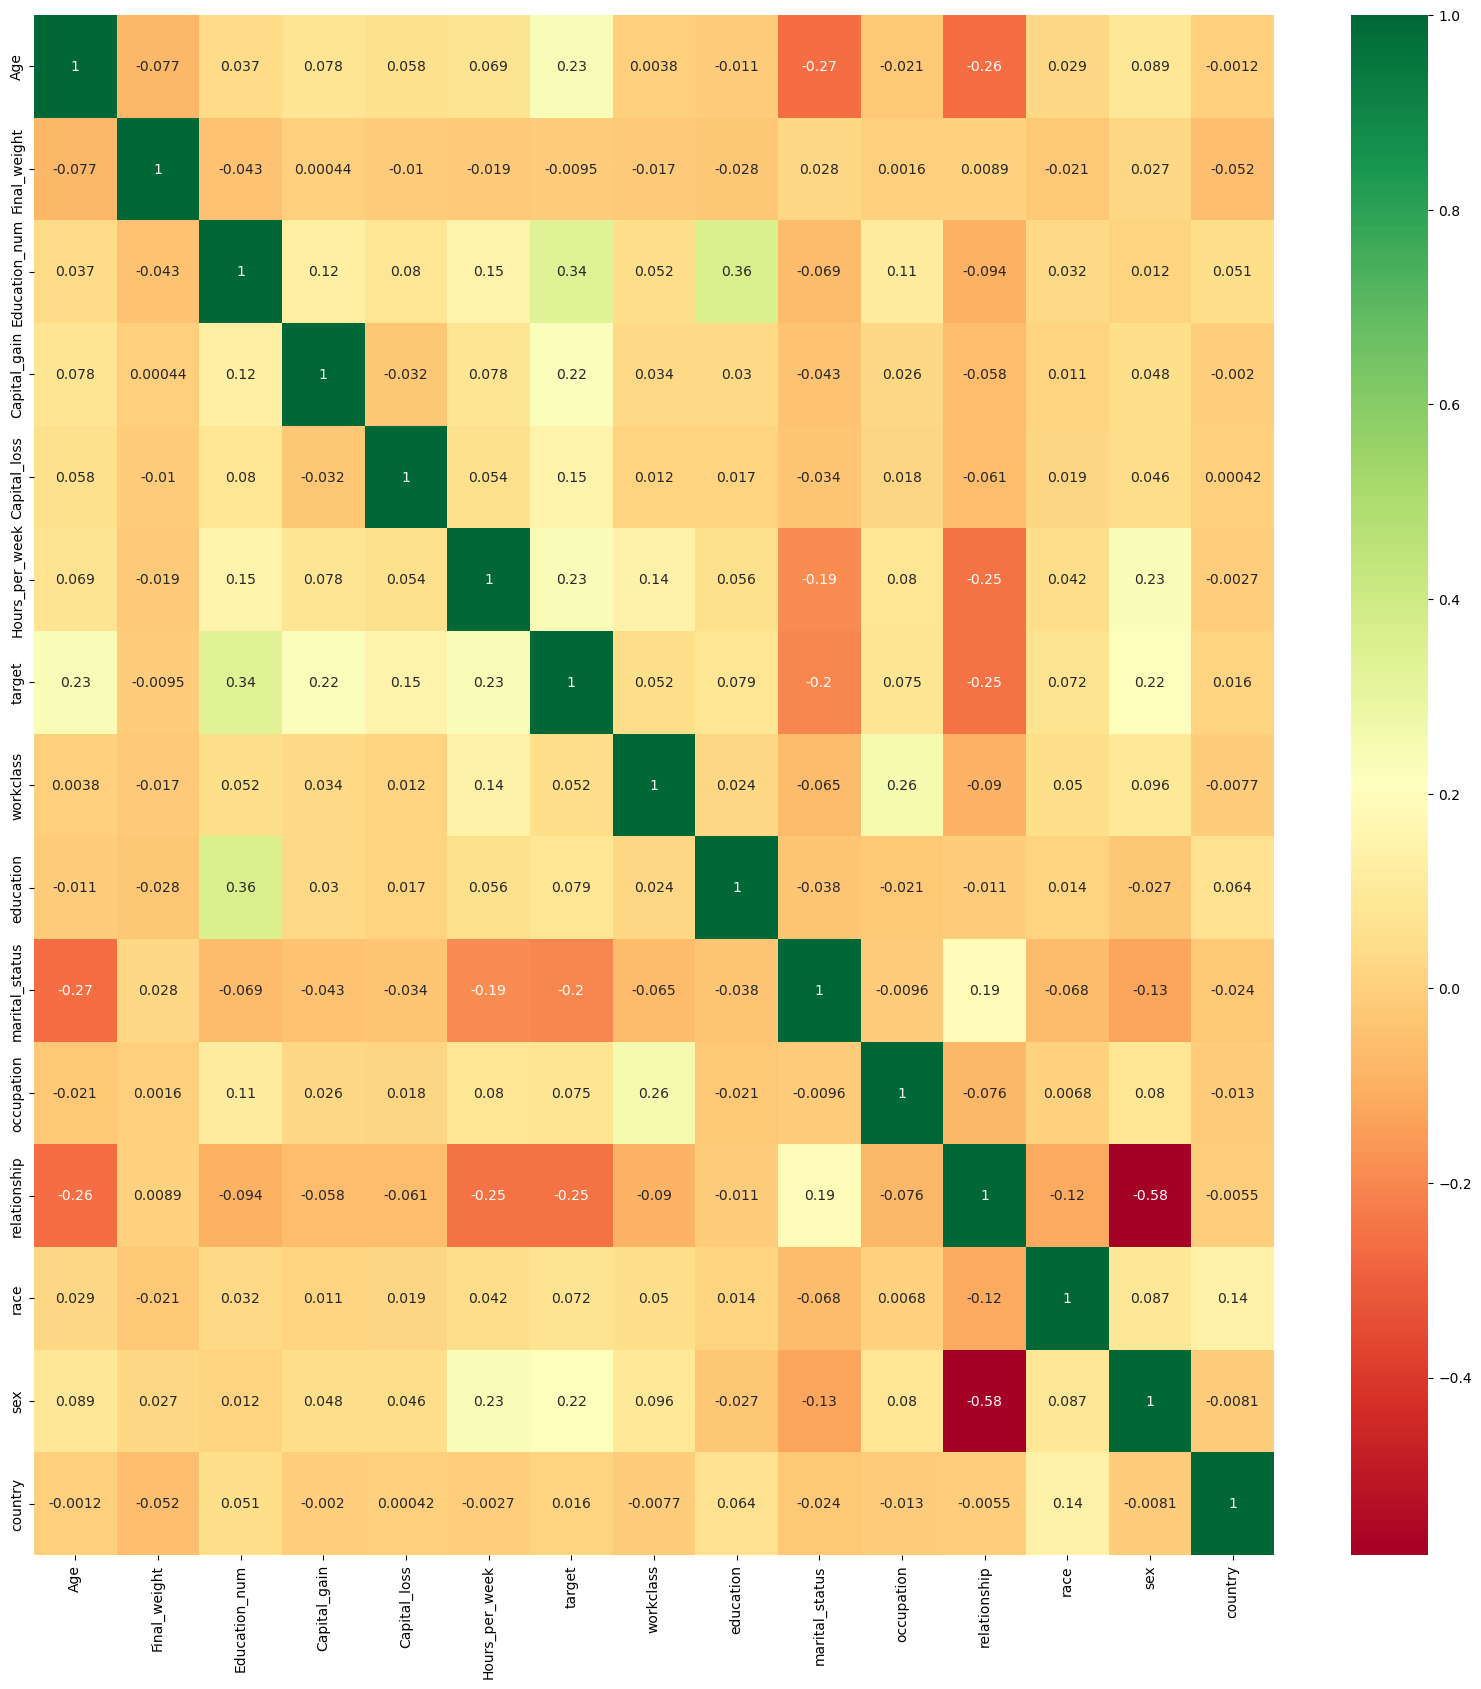

In [37]:
#get correlations of each features in the dataset
corrmat= df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(), annot= True, cmap= "RdYlGn")

## using the correlation heatmap as the method of features selection

**from the heat map, it is noticed that the best features with correlation to the target variables are:**
1. Sex
2. Hours_per_week
3. capital_loss
4. capital_gain
5. Education_num
6. Age
7. Education
8. Occupation
9. race
10. workclass 
11. country
**Hence the following features would be dropped:**
1. Final_weight
2. Marital_status
3. Relationship



In [38]:
#dropping variables that won't be needed
vars_to_drop= ["Final_weight", "relationship" , "marital_status",]
df.drop(columns =  vars_to_drop, inplace = True)

df.shape

(32560, 12)

In [39]:
df.head()

,Age,Education_num,Capital_gain,Capital_loss,Hours_per_week,target,workclass,education,occupation,race,sex,country
0,50,13,0,0,13,0,6,9,4,4,1,39
1,38,9,0,0,40,0,4,11,6,4,1,39
2,53,7,0,0,40,0,4,1,6,2,1,39
3,28,13,0,0,40,0,4,9,10,2,0,5
4,37,14,0,0,40,0,4,12,4,4,0,39


## Model Selection 

In [40]:
# independent features
X = df.drop(columns=TARGET)

# Target variable
y = df[TARGET]

In [ ]:
print(X)

In [ ]:
print(y)

In [41]:
x= np.asarray(X)
y= np.asarray(y)

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
#import of packages
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [44]:
#importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [45]:
models = [LogisticRegression(max_iter=1000), SVC(kernel = 'linear'), KNeighborsClassifier(),  RandomForestClassifier(random_state=0) ]

In [46]:
def compare_models_cross_validation():
    
    for model in models:
        
        cv_score = cross_val_score(model, x, y, cv= 5)
        mean_accuracy = sum(cv_score)/len(cv_score)
        mean_accuracy = mean_accuracy*100
        mean_accuracy = round(mean_accuracy, 2)
        
        print('Cross Validation accuracies for the', model , '=', cv_score)
        print('Accuracy score of the ', model, '=', mean_accuracy, '%')
        print('---------------------------------------------------------------------------------')
        

In [ ]:
compare_models_cross_validation()

Cross Validation accuracies for the LogisticRegression(max_iter=1000) = [0.79867936 0.79775799 0.81910319 0.79929361 0.80605037]
Accuracy score of the  LogisticRegression(max_iter=1000) = 80.42 %
---------------------------------------------------------------------------------


**inference: for my dataset only the logistic regression ran, hence i would be using the logistic regression mode**

**splitting the data into train dataset and test dataset**

In [ ]:

from sklearn.model_selection import train_test_split

# independent features
X = df.drop(columns=TARGET)

# Target variable
y = df[TARGET]
# independent features
X 

# Target variable
y 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

X_train.shape, X_test.shape

In [ ]:
X_train.isna().sum()

In [ ]:
X_test.isna().sum()

In [ ]:
X_train.head()

In [ ]:
X_train.dtypes

In [ ]:
X_test.head()

In [ ]:
np.round(y_pred, 0)

In [ ]:
np.array([round(pred) for pred in y_pred])

In [ ]:
#instantiate
decision_tree_model = DecisionTreeRegressor(random_state = RANDOM_STATE)

#fitting
decision_tree_model.fit(X, y_train)

#make predictions
y_pred = decision_tree_model.predict(X_test)
decision_tree_model

In [ ]:
def create_result_dataframe(*, y_true: np.ndarray, y_pred: np.ndarray) -> pd.DataFrame:
    """This returns a DataFrame containing the true,
    predicted and error values."""
    # Convert predictions to a dataframe
    result = pd.DataFrame()  # Empty DF

    result["Actual_score"] = y_true
    result["Predicted_score"] = y_pred
    result["Error_in_predictions"] = result["Actual_score"] - result["Predicted_score"]

        

In [ ]:
#instantiate
linear_model = LinearRegression()

#fitting
linear_model.fit(X_train, y_train)

#prediction
y_pred = linear_model.predict(X_test)

In [ ]:
result = create_result_dataframe(y_true=y_test, y_pred=y_pred)
print(result)